In [1]:
import pandas as pd

In [2]:
#data is taken from the source

data=pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
#for missing values

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#pip install dtale

In [8]:
#Automated EDA for the better clearifiction of the imported data

import dtale
dtale.show(data)

Points to considerd till now:
1. The csv fie is taken by pandas as name data.
2. No missing values was found on the data.

# Converting text data to numerical data

In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

data['type']=lb.fit_transform(data['type'])


In [12]:
data['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [13]:
data['nameOrig']=lb.fit_transform(data['nameOrig'])
data['nameDest']=lb.fit_transform(data['nameDest'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


Point to be considered till now:
1. Three object type attributes (type,nameOrig and nameDest).
2. Converted into numerical attributes by the help of Label Encoding 

# Dividing into training and testing

In [15]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2,random_state=42)

In [16]:
test.size

13997764

In [17]:
train.size

55991056

In [18]:
x_train=train.drop('isFraud',axis=1)
x_test=test.drop('isFraud',axis=1)
x_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
6271196,619,0,386385.08,4449199,4669568.85,5055953.92,289167,506035.06,119649.98,0
1888243,164,0,212458.78,5813773,234635.00,447093.78,204382,806037.88,593579.10,0
5549957,382,3,19967.60,5870502,3634.00,0.00,1346491,0.00,0.00,0
2025342,180,1,527616.51,5095916,180216.00,0.00,446948,92157.10,619773.61,0
682342,36,4,206067.85,5557736,0.00,0.00,338417,2131494.48,2337562.32,0


In [19]:
y_train=train['isFraud'].copy()
y_test=test['isFraud'].copy()
y_train.head()

6271196    0
1888243    0
5549957    0
2025342    0
682342     0
Name: isFraud, dtype: int64

In [20]:
y_train.value_counts()

isFraud
0    5083503
1       6593
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e39e6a9d90>,
 [Text(-1.099990892871439, 0.004476114374567543, ' Not Fraud'),
  Text(1.0999908927568456, -0.004476142535507785, 'Fraud')])

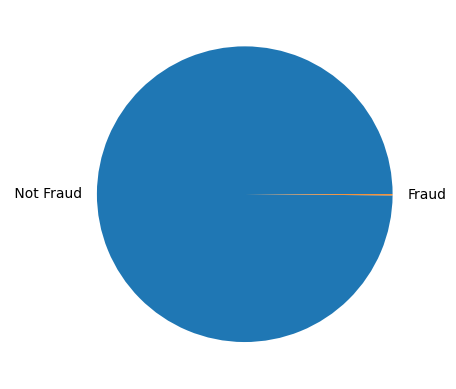

In [21]:
import matplotlib.pyplot as plt
plt.pie(y_train.value_counts(),labels=[' Not Fraud','Fraud'])

Points to be considered till now:
1. Test and train dataset is defined.
2. The datset is imbalanced dataset.

# Handling Imbalanced Datasets

In [22]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x,y=smote.fit_resample(x_train,y_train)

In [23]:
import numpy as np
np.bincount(y)

array([5083503, 5083503], dtype=int64)

Points to be considered till now:
1. Imbalanced dataset converted using SMOTE
2. New dataset of 0-> 5083503 and 1-> 508503.

# Correlation of the data

<Axes: >

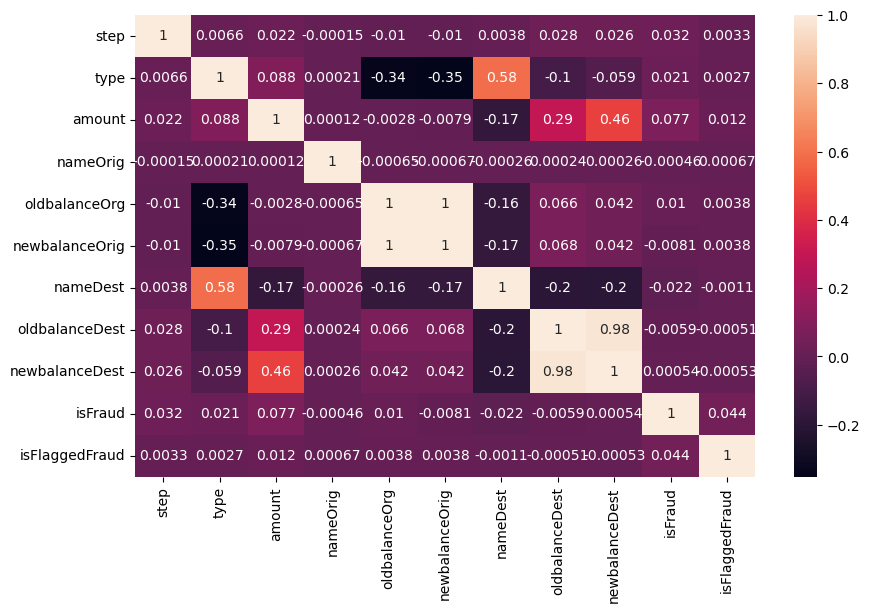

In [24]:
import seaborn as sns
corr_matrix=data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True)

Points to be considered till now:
1. The correlation matrix is obtained.
2. The amount is highly correlated to the isFraud

# Model fitting

In [25]:
## It is a binary classification task

#### Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression
model_test_lr=LogisticRegression()
model_test_lr.fit(x,y)
y_predict_lr=model_test_lr.predict(x_test)

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict_lr)*100)

95.47065517035435


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270904
           1       0.03      0.92      0.05      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.98   1272524



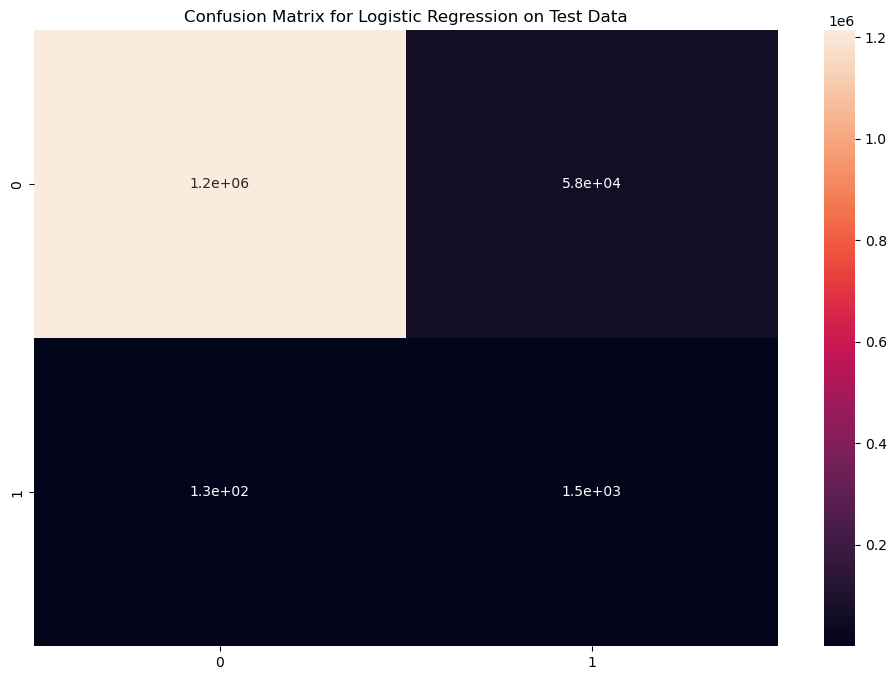

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test,y_predict_lr)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()

Points to be considered till now:
1. Logistic Resgression Accuracy= 95.47065517035435%.
2. Logistic Regression can't handle that much amount of data and result in failed of convergence.
3. So it is overfitting and needed strong model compared to it.

#### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model_test_knn=KNeighborsClassifier()
model_test_knn.fit(x,y)
y_predict_knn=model_test_knn.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict_knn))

0.9940008990007261


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.14      0.72      0.23      1620

    accuracy                           0.99   1272524
   macro avg       0.57      0.86      0.62   1272524
weighted avg       1.00      0.99      1.00   1272524



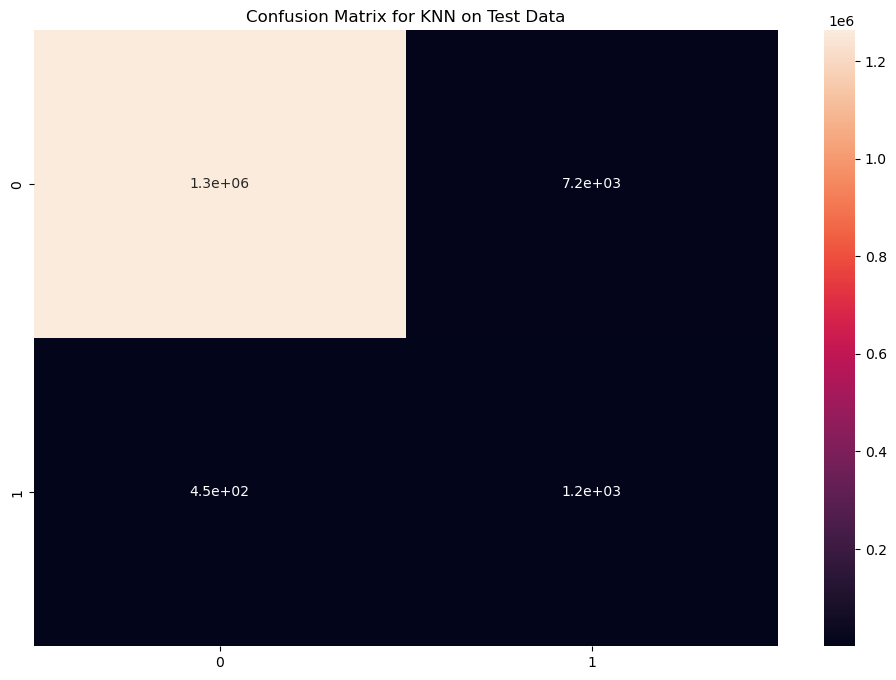

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for KNN on Test Data")
plt.show()

Points to be considered till now:
1. Accuracy= 0.9940008990007261


#### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
model_test_rfc=RandomForestClassifier()
model_test_rfc.fit(x,y)
y_predict_rfc=model_test_rfc.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict_rfc))

0.9992149460442397


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.63      0.96      0.76      1620

    accuracy                           1.00   1272524
   macro avg       0.81      0.98      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



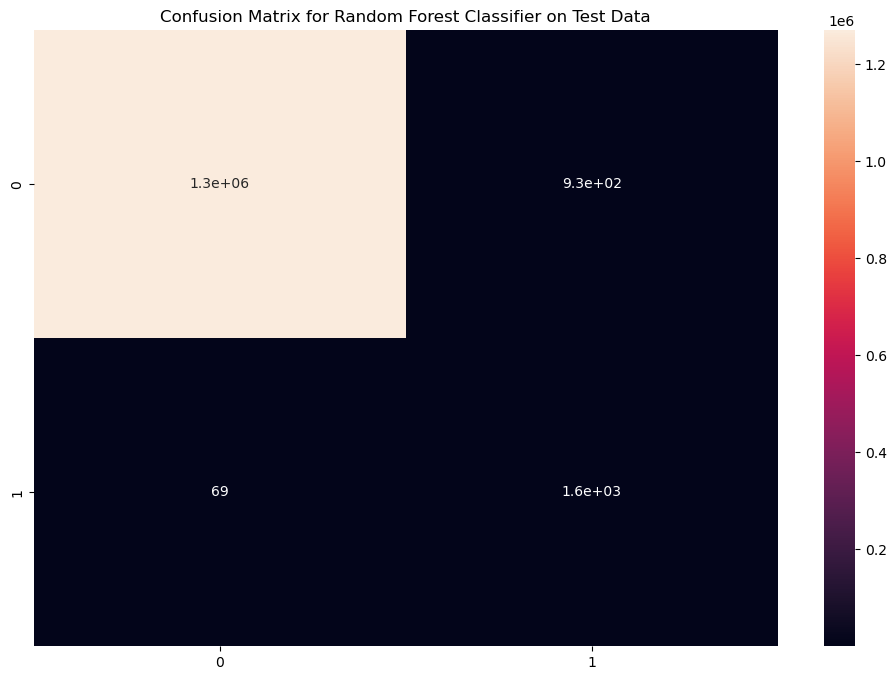

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test,y_predict_rfc)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Points to be considered till now:
1. Accuracy= 99.9219661083013%
2. Decision tree is not used due to overfitting.
3. Give least false results in confusion matrix and have highest precision and recall rate.

#### Naive Bayes 

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x,y)
y_pred=nb.predict(x_test)
accuracy_score(y_test,y_pred)*100

75.8157802917666

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86   1270904
           1       0.00      0.77      0.01      1620

    accuracy                           0.76   1272524
   macro avg       0.50      0.77      0.44   1272524
weighted avg       1.00      0.76      0.86   1272524



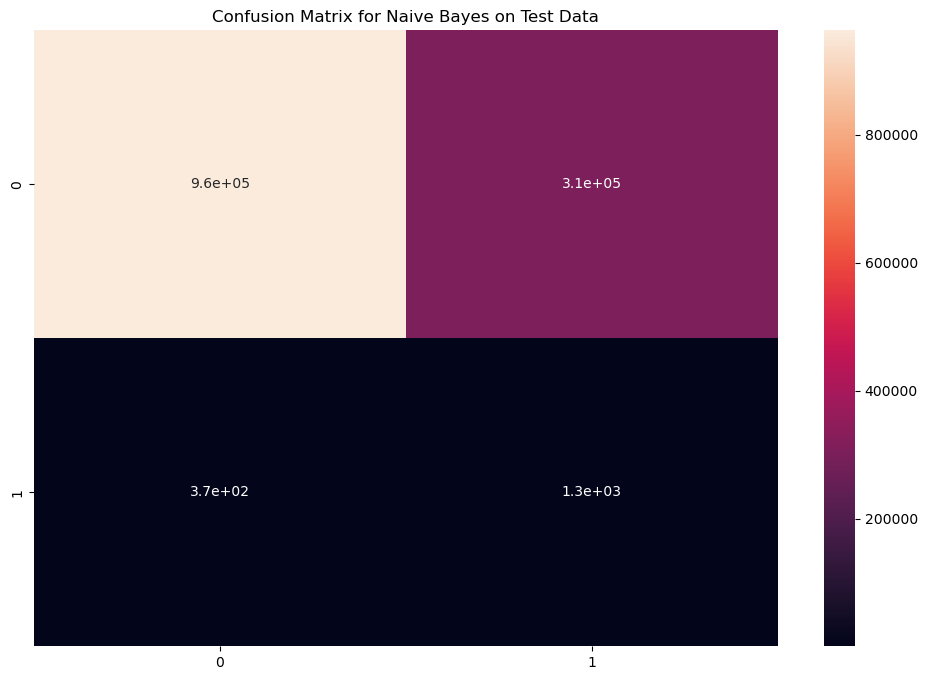

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes on Test Data")
plt.show()

Points to be considered till now:
1.Accuracy= 75.8157802917666 %

#### ANN

In [41]:
pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
  Using cached keras_tuner-1.4.6-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)
Using cached keras_tuner-1.4.6-py3-none-any.whl (128 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
import keras

from sklearn.model_selection import GridSearchCV
from keras.activations import relu,sigmoid,softmax
from keras.models import Sequential
from  keras.layers import Dropout,Dense,Activation
from keras_tuner import RandomSearch

2024-02-01 12:11:38,973 - WARNING  - From C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



In [43]:
def build_model(hp):
    model=Sequential()
    hp_activation=hp.Choice('activation',values=['relu','tanh','sigmoid','LeakyRelu','PReLU','ELU'])
    hp_layer_1=hp.Int('layer1',min_value=1,max_value=1000,step=100)
    hp_layer_2=hp.Int('layer2',min_value=1,max_value=1000,step=100)
    hp_layer_3=hp.Int('layer3',min_value=1,max_value=1000,step=100)
  
    model.add(Dense(units=hp_layer_1,activation=hp_activation,input_dim=x.shape[1]))
    model.add(Dense(units=hp_layer_2,activation=hp_activation))
    model.add(Dense(units=hp_layer_3,activation=hp_activation))

    model.add(Dropout(0.3))
    model.add(Dense(112,activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4,1e-7])),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [51]:
tune=RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    directory='proj',
    project_name='fraud_detection'
)

In [52]:
tune.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'LeakyRelu', 'PReLU', 'ELU'], 'ordered': False}
layer1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1000, 'step': 100, 'sampling': 'linear'}
layer2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1000, 'step': 100, 'sampling': 'linear'}
layer3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1000, 'step': 100, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001, 1e-07], 'ordered': True}


In [53]:
tune.search(x,y,epochs=5,validation_data=(x_test,y_test))

Trial 1 Complete [02h 09m 27s]
val_accuracy: 0.9926123023033142

Best val_accuracy So Far: 0.9926123023033142
Total elapsed time: 02h 09m 27s


In [54]:
tune.results_summary()

Results summary
Results in proj\fraud_detection
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
activation: PReLU
layer1: 901
layer2: 101
layer3: 701
learning_rate: 0.01
Score: 0.9926123023033142


Points to be considered till now:
1. Accuracy=99.262

# Saving model

In [58]:
#saving random forest using pickle
import pickle
filename = 'model_rfc.sav'
pickle.dump(model_test_rfc, open(filename, 'wb'))

# Conclusion

By comparing all the models I get the result that Random Forest Classifier is best for this dataset due to higher accuracy,higher precision and higher recall than others.

Tasks quesions:

1. Data cleaning including missing values, outliers and multi-collinearity.

Ans- There is no missing values present but the dataset is imbalanced dataset so I use the SMOTE technique.


2. Describe your fraud detection model in elaboration.

Ans- Compared all the binary classifications model and found random forest classifier is best by keping the precision and recall values in mind.


3. How did you select variables to be included in the model?

Ans- VAriables are frst converted from text to numericals attributes and dataset is updated by balancing the dataset using the SMOTE technique.


4. Demonstrate the performance of the model by using best set of tools.

Ans- The performance of the model can be seen by the confuioon matrix and the classification report mentioned above.


5. What are the key factors that predict fraudulent customer?

Ans- According to the correlation matrix the amount had highest correlation with the isFraud.


6. Do these factors make sense? If yes, How? If not, How not?

Ans- Yes the amount factor plays a cruicial amount in the prediction if the amount is high then the chances of being fraud is comparably better.


7. What kind of prevention should be adopted while company update its infrastructure?

Ans- While company updates its infrastructure and brings change in the dataset then they have to provide new entries to the model also.


8. Assuming these actions have been implemented, how would you determine if they work?

Ans- The model is trained and saved   to implement it just open it through pickle no need to train test just give the new values to it.